In [0]:
import os
from Audio_reader import readtf
from getman import getmanlist
import gc
import numpy as np
import pandas as pd
import pickle
from keras.layers import Dense, Input, Dropout,Flatten,MaxPooling1D
from keras.layers import Conv1D, MaxPooling2D,BatchNormalization,Conv2D
from keras.models import Model
from keras.models import Sequential
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers

In [0]:
def check(y):
    if 74 in y:
        return 0 
    #male
    if 1 in y:
        return 1
    #female
    if 2 in y:
        return 2
    #child
    if 3 in y:
        return 3
    return 0

In [0]:
X = []
Y = [] 
with open("X_list_eval.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list_eval.pickle","rb") as xf:
    Y.extend(pickle.load(xf))
      
with open("X_list.pickle","rb") as xf:
    X.extend(pickle.load(xf))
with open("Y_list.pickle","rb") as xf:
    Y.extend(pickle.load(xf))

X=np.array(X)
Y=np.array(Y)  

X = X.astype('float32')    
X /= 128



In [0]:
learning_rate=0.0003
#decay=0.000001
momentum=0.99
dropout_rate = 0.23

rglrzr = regularizers.l2(0.0015)

In [144]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',activation='relu',input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=dropout_rate))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(rate=dropout_rate))



model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=dropout_rate))


model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(rate=dropout_rate))



model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same',activation='relu',bias_regularizer=rglrzr))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 2)))
model.add(Dropout(rate=dropout_rate))




model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

optimizer = optimizers.SGD(lr=learning_rate,momentum=momentum)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_224 (Conv2D)          (None, 10, 128, 64)       640       
_________________________________________________________________
batch_normalization_222 (Bat (None, 10, 128, 64)       256       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 5, 64, 64)         0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 5, 64, 64)         0         
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 5, 64, 128)        73856     
_________________________________________________________________
batch_normalization_223 (Bat (None, 5, 64, 128)        512       
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 5, 32, 128)        0         
__________

In [0]:
cb=[]

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=0, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

cb.append(reduce_lr)
cb.append(early_stopping)

In [145]:
history=model.fit(X, Y,
          batch_size=32,
          epochs=200,
          verbose=2,
          callbacks=cb,
          validation_split=0.3)

Train on 443 samples, validate on 190 samples
Epoch 1/200
 - 13s - loss: 1.5433 - acc: 0.5147 - val_loss: 1.0616 - val_acc: 0.4474
Epoch 2/200
 - 1s - loss: 1.2229 - acc: 0.5147 - val_loss: 1.4991 - val_acc: 0.6053
Epoch 3/200
 - 1s - loss: 1.1229 - acc: 0.5418 - val_loss: 1.0704 - val_acc: 0.5842
Epoch 4/200
 - 1s - loss: 0.9363 - acc: 0.5847 - val_loss: 2.6375 - val_acc: 0.5789
Epoch 5/200
 - 1s - loss: 0.9528 - acc: 0.5779 - val_loss: 2.5844 - val_acc: 0.1947
Epoch 6/200
 - 1s - loss: 0.9013 - acc: 0.5982 - val_loss: 2.3604 - val_acc: 0.1947
Epoch 7/200
 - 1s - loss: 0.8591 - acc: 0.6253 - val_loss: 1.1138 - val_acc: 0.5632
Epoch 8/200
 - 1s - loss: 0.8452 - acc: 0.6163 - val_loss: 1.7805 - val_acc: 0.2053
Epoch 9/200
 - 1s - loss: 0.8259 - acc: 0.6388 - val_loss: 2.1781 - val_acc: 0.2158
Epoch 10/200
 - 1s - loss: 0.7906 - acc: 0.6569 - val_loss: 2.2310 - val_acc: 0.2000
Epoch 11/200
 - 1s - loss: 0.7593 - acc: 0.6727 - val_loss: 1.2804 - val_acc: 0.3947
Epoch 12/200
 - 1s - loss: 

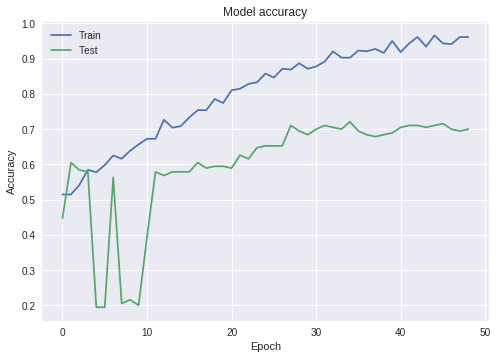

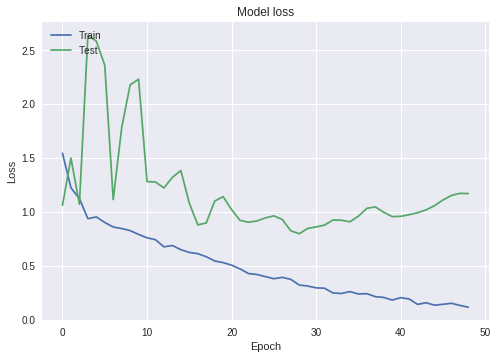

In [146]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()